# Analysis of the collected data

The data was collected from the BoardGameGeek API ("https://boardgamegeek.com/xmlapi2/thing
"). It contains a comprehensive collection of board games, with a wide range of information including game names, rankings, ratings, descriptions, and various other details.

Firstly, we will load the data and analyze each column to retrieve only relevant information.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df1 = pd.read_csv("bgg_boardgames_full_sorted_part01.csv")
df2 = pd.read_csv("bgg_boardgames_full_sorted_part02.csv")
df3 = pd.read_csv("bgg_boardgames_full_sorted_part03.csv")

# Concatenate the dataframes while maintaining their order
df = pd.concat([df1, df2, df3], ignore_index=True)

print(df.head(1))

C:\Users\up202207552\AppData\Local\Temp\ipykernel_23280\638423124.py:6: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("bgg_boardgames_full_sorted_part01.csv")


       id       type               name  \
0  224517  boardgame  Brass: Birmingham   

                                           alt_names  yearpublished  \
0  Brass. Бирмингем, Brass. Бірмінгем, ブラス：バーミンガム...           2018   

                                         description  \
0  Brass: Birmingham is an economic strategy game...   

                                               image  \
0  https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...   

                                           thumbnail  minplayers  maxplayers  \
0  https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...           2           4   

   ...   stddev  median  owned  trading wanting wishing numweights  \
0  ...  1.42058       0  77098      288    1749   20493       2638   

  averageweight rank_boardgame           ranks_other  
0        3.8685              1  Strategy Game Rank:1  

[1 rows x 37 columns]


We will start our investigation on the first and the second collumn analyzing if there is repeated id's and if in the second column there is only one type of game (boardgame)

There are 0 duplicated rows
There are 0 duplicated ids


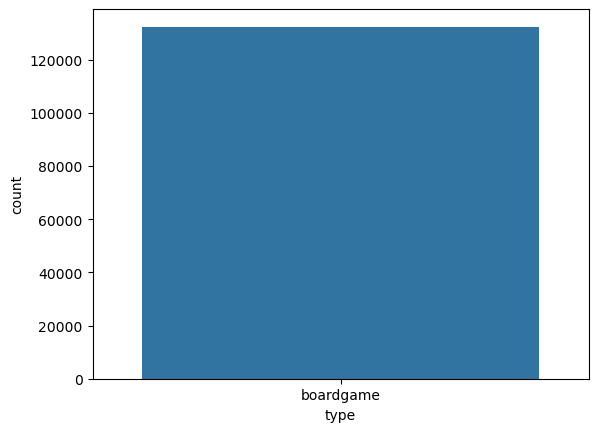

In [11]:
duplicateds = df[df.duplicated()]

print(f'There are {duplicateds.shape[0]} duplicated rows') # duplicated rows

duplicatedsId = df[df.duplicated(subset=["id"])]

print(f'There are {duplicatedsId.shape[0]} duplicated ids')  # duplicated ids

sb.countplot(df, x = "type")
plt.show()

As we observe, all entries in the "type" column are labeled as "boardgame," which is expected. Therefore, we can safely remove this column, as it does not contribute meaningfully to our analysis.

In [17]:
# Check for validity in key columns
invalid_players = df[(df['minplayers'].isnull()) | (df['maxplayers'].isnull()) | (df['minplayers'] == 0) | (df['maxplayers'] == 0)]
invalid_names = df[df['name'].isnull()]
print(f"Rows with invalid player numbers: {invalid_players.shape[0]}")
print(f"Rows with missing names: {invalid_names.shape[0]}")
if not invalid_players.empty:
    print("Sample invalid player rows:")
    print(invalid_players.head())
if not invalid_names.empty:
    print("Sample rows with missing names:")
    print(invalid_names.head())

Rows with invalid player numbers: 5811
Rows with missing names: 0
Sample invalid player rows:
          id       type                                               name  \
3325   21804  boardgame                             Traditional Card Games   
3893   18291  boardgame                              Unpublished Prototype   
4006   37301  boardgame                                            Decktet   
5137   23953  boardgame                           Outside the Scope of BGG   
5837  170669  boardgame  Old School Tactical: Volume 1 – Fighting on th...   

                                 alt_names  yearpublished  \
3325   Kaarten, Kaartspelen, Playing Cards              0   
3893                                   NaN              0   
4006  Deco Decktet, Double Decktet, Дектет           2008   
5137                                   NaN              0   
5837                                   NaN           2016   

                                            description  \
3325  Tradi